# Imports

In [539]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# 0.0 - Metodologia

#### 0.1 - CRISP DM
É uma metodologia que fornece uma abordagem estruturada para processos de mineração de dados, sendo amplamente utilizada devido à sua poderosa praticidade, flexibilidade e utilidade ao usar a análise para resolver problemas comerciais complexos.  

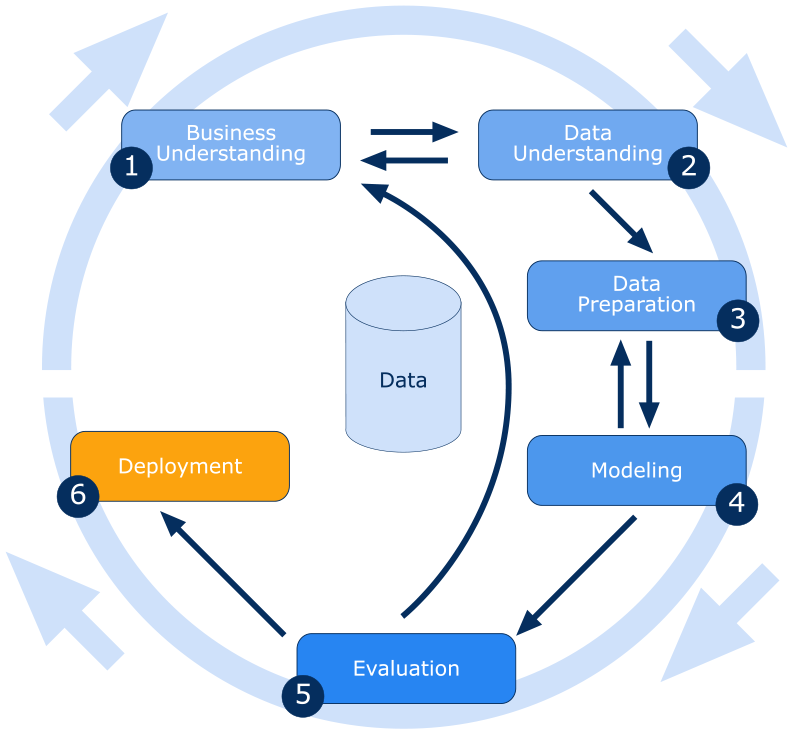

In [540]:
image = Image.open(r'C:\Users\Matheus Moura\Desktop\Projetos DS\.ipynb_checkpoints\1546015659-crispen.png')
image


#### 0.2 - Etapas
* **1.Compreensão do negócio**  
A primeira fase consiste em identificar o problema/tema a ser abordado e definir os objetivos e requisitos do projeto.  
É preciso também entender como a questão afeta a organização e descobrir fatores que possam influenciar o resultado do projeto.
Descreva o plano pretendido para atingir as metas de mineração de dados e, assim, alcançar as metas de negócios. Seu plano deve especificar as etapas a serem executadas durante todo o projeto, incluindo a seleção inicial de ferramentas e técnicas.

* **2. Compreensão dos dados**  
Essa etapa consiste em coletar, organizar e documentar todos os dados que se encontram disponíveis para realizar a análise exploratória. Se você utiliza diversas fontes de dados, precisará considerar como e quando integrá-las.  
É aqui que começa de fato o trabalho de mineração de dados, pois o profissional deve ser capaz de identificar quais são os dados importantes para a resolução do problema e analisar sua qualidade. Nesta fase também já é possível identificar padrões e valores extremos, além de obter insights e descobrir novas hipóteses para serem testadas.

* **3.Preparação dos dados**  
Essa fase abrange todas as atividades para construir o conjunto de dados final a partir da base de dados brutos inicial. Ou seja, é feita a escolha dos dados que serão trabalhados, de como eles serão cruzados para resolver o problema da empresa, a preparação das databases e a definição do formato que será necessário para a análise.  
Aqui é realizada a mineração de dados, considerando fatores como a relevância, a qualidade e as restrições técnicas, como limites no volume ou tipo de dados. Além disso, é preciso definir métodos de avaliação de desempenho para que seja realizada nas próximas fases.

* **4.Modelagem**  
Aqui são selecionadas e aplicadas as técnicas de Data Mining mais apropriadas, com base nos objetivos identificados na primeira fase. A partir de agora, a mineração de dados pode ser associada a análises preditivas para que a empresa preveja as tendências dos negócios. É de bom costume escolher mais de um modelo para medir seu desempenho de performance computacional e o resultado esperado (ex: acurácia).

* **5.Avaliação**  
Nessa fase, é preciso avaliar os resultados e levantar todas as possibilidades de variações que os dados possam ter, analisando se existe algum fator que tenha sido negligenciado e até que ponto o modelo atende aos objetivos de negócios. Caso o modelo não está performando como esperado, devemos retomar a primeira etapa para entender o negócios e os dados.  
Isso também pode ser feito por meio de reuniões, onde os dados e insights são apresentados para os envolvidos nas tomadas de decisão.  
Dependendo dos resultados da avaliação e da revisão do processo, você decide como proceder. É possível concluir o projeto e passar para a fase da implantação ou é necessário configurar novas técnicas de mineração de dados? Você também deve fazer um balanço dos recursos e orçamento restantes, pois isso pode influenciar suas decisões.

* **6.Desenvolvimento**  
Após obter os resultados da avaliação, é preciso definir uma estratégia para a implantação do projeto. É aqui que a análise preditiva realmente ajuda a melhorar o lado operacional de seus negócios.  
Em muitos casos, o cliente será o maior contribuinte desta etapa. Mesmo que o analista desenvolva o modelo, é o cliente quem deve entender as ações que deverão ser executadas para assim fazer uso do modelo criado.  
Por fim, avalie o que deu certo e o que deu errado, o que foi bem feito e o que precisa ser melhorado para os próximos projetos.

# 1.0 - Compreensão do negócio

#### 1.1 - Descrição do problema  
As doenças cardiovasculares (DCVs) são a causa número 1 de morte no mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo.
A insuficiência cardíaca é um evento comum causado por DCVs e este conjunto de dados contém 12 recursos que podem ser usados ​​para prever a mortalidade por insuficiência cardíaca.

A maioria das doenças cardiovasculares pode ser prevenida abordando os fatores de risco comportamentais, como uso de tabaco, dieta não saudável e obesidade, sedentarismo e uso prejudicial de álcool, usando estratégias populacionais.

Pessoas com doenças cardiovasculares ou que apresentam alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção e gerenciamento precoces, em que um modelo de aprendizado de máquina pode ser de grande ajuda.

#### 1.2 - 5Ws  
* **What (O quê?):**  
    Prever quais pessoas tem maior probabilidade de morrer por doenças cardiovasculares  
* **Where (Onde?):**   
    Faisalabad Institute of Cardiology e no Allied Hospital em Faisalabad (Punjab, Paquistão)
* **When (Quando?):**  
    Durante o periodo de abril-dezembro de 2015
* **Why (Por quê?):**  
    Detectar e gerenciar de forma precoce, pessoas com maior probabilidade de morte por doenças cardiovasculares 
* **Who (Quem?):**  
    Pacientes com insuficiência cardíaca e com condições pré-existentes  

#### 1.3 - Solução
* 1.2.1 - Criar um modelo de previsão de pacientes que tem maior probabildiade de morrer por doença cardiovasculares 
* 1.2.2 - Exportar uma tabela com a predição
    * 1.2.2.1 - **Inputs:** informações do paciente  
    * 1.2.2.2 - **Output:** informações do paciente com o valor predito


#### 1.4 - Hipoteses 
* **H.01** - Os pacientes do sexo masculino tendem a morrer mais que o do feminino 
* **H.02** - Quanto maior o nivel de sódio sérico no sangue, maior a quantidade de mortes por doença cardiovascular
* **H.03** - Quanto maior o nivel da enzima CPK no sangue, maior a quantidade de mortes por doença cardiovascular
* **H.04** - Quanto maior o nivel de creatinina sérica no sangue, maior a quantidade de mortes por doença cardiovascular  
* **H.05** - Quanto mais pré-condições existentes, maior a quantidade de mortes por doença cardiovascular
* **H.06** - Quanto mais velho o paciente, maior a quantidade de mortes por doença cardiovascular
* **H.07** - Pacientes que tem o historico de fumante, tendem a morrer mais que os não fumantes

#### 1.5 - Perguntas
* **P.01** - Qual o quantitativo de mortes por condições ou doenças, agrupado por sexo? 
* **P.02** - A correlação entre a quantidade de sangue saindo do coração a cada contração com a quantidade de plaquetas no sangue?



# 2.0 - Compreensão dos dados

#### 2.1 - Informações do Dataset  
* **age -** Idade dos pacientes  
* **anaemia -** Diminuição de glóbulos vermelhos ou hemoglobina (booleano)    
* **creatinine_phosphokinase -** Nível da enzima CPK no sangue (mcg / L)   
* **diabetes -** Se o paciente tem diabetes (booleano)   
* **ejection_fraction -** Porcentagem de sangue saindo do coração a cada contração (porcentagem)  
* **high_blood_pressure -** Se o paciente tem hipertensão (booleano)    
* **platelets -** Plaquetas no sangue (quiloplacas / mL)  
* **serum_creatinine -** Nível de creatinina sérica no sangue (mg / dL)  
* **serum_sodium -** Nível de sódio sérico no sangue (mEq / L)
* **sex -** Mulher ou homem (binário)  
* **smoking -** Se o paciente fuma ou não (booleano)  
* **time -** Período de acompanhamento (dias) 
* **DEATH_EVENT -** Se o paciente faleceu durante o período de acompanhamento (booleano)  



In [541]:
#Dataset import
#https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
dfDCV = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [542]:
total_homem = dfDCV['sex']
total_homem = total_homem[total_homem == 1].count()
total_mulher = dfDCV['sex']
total_mulher = total_mulher[total_mulher == 0].count()
total_homem

194

In [543]:
total_homem_death = dfDCV[['sex','DEATH_EVENT']]
total_homem_death = total_homem_death[(total_homem_death['sex'] == 1) & (total_homem_death['DEATH_EVENT']==1)]
total_homem_death = total_homem_death['DEATH_EVENT'].count()

total_mulher_death = dfDCV[['sex','DEATH_EVENT']]
total_mulher_death = total_mulher_death[(total_mulher_death['sex'] == 0) & (total_mulher_death['DEATH_EVENT']==1)]
total_mulher_death = total_mulher_death['DEATH_EVENT'].count()
total_mulher_death

34

**H.01** - Os pacientes do sexo masculino tendem a morrer mais que o do feminino 
   * **R:** Falso. Em percentual, o numero de mulheres que morrem a mais em relação ao homem é menor que 1%

In [544]:
def eqp(x,y):
    if y == 0:
        s = x/total_mulher
    else:
        s = x/total_homem
    return s * 100

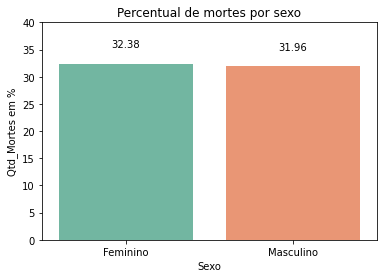

In [545]:
aux1 = dfDCV[['sex','DEATH_EVENT']].groupby(['sex']).sum().reset_index()
aux1['percentual'] = aux1.apply(lambda x: eqp(x['DEATH_EVENT'],x['sex']),axis=1)
aux1['sex'] = aux1['sex'].map({0:'Feminino',1:'Masculino'}) 
sns.set_palette("Set2")
ax = sns.barplot(x='sex',y='percentual',data=aux1)
plt.ylim(0,40)
plt.ylabel('Qtd_Mortes em %')
plt.xlabel('Sexo')
plt.title('Percentual de mortes por sexo')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 3,
    '{:1.2f}'.format((height)),
    ha='center')

**H.02** - Quanto maior o nivel de sódio sérico no sangue, maior a quantidade de mortes por doença cardiovascular
   * **R:** Depende. Os maiores numeros de mortes estão entre 132 e 140

Text(0.5, 0, 'Qtd_serica_sodio')

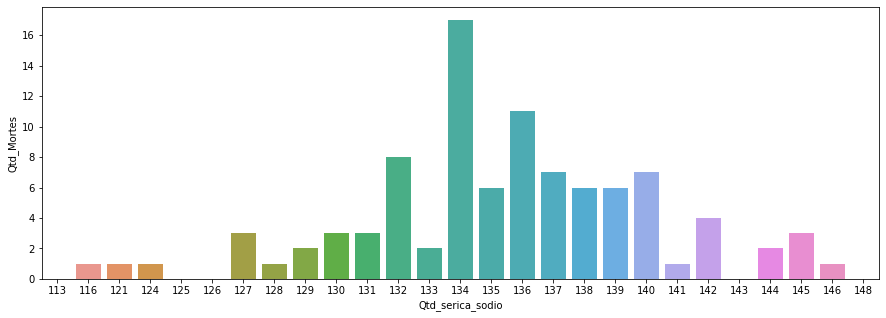

In [546]:
plt.figure(figsize=(15,5))
aux2 = dfDCV[['serum_sodium','DEATH_EVENT']].groupby('serum_sodium').sum().reset_index()
sns.set_palette("Reds")
ax = sns.barplot(x='serum_sodium',y='DEATH_EVENT',data=aux2)
plt.ylabel('Qtd_Mortes')
plt.xlabel('Qtd_serica_sodio')

**H.03** - Quanto maior o nivel da enzima CPK no sangue, maior a quantidade de mortes por doença cardiovascular
   * **R:** Falso. Os maiores numeros de mortes estão entre entre 100 *~* 200 e 500 *~* 600

In [547]:
def agroupCreat (t):
    if t <= 100:
       s = "0.<=100"
    elif t <= 200:
       s = "1.>100 e <=200"
    elif t <= 300:
       s = "2.>200 e <=300"
    elif t <= 400:
       s = "3.>300 e <=400"
    elif t <= 500:
       s = "4.>400 e <=500"
    elif t <= 600:
       s = "5.>500 e <=600"
    elif t <= 700:
       s = "6.>600 e <=700"
    elif t <= 800:
       s = "7.>700 e <=800"
    elif t <= 900:
       s = "8.>800 e <=900"
    elif t <= 1000:
       s = "99.>900 e <=1000"
    else:
       s = "999.>1000"
    return s


In [548]:
dfDCV['creatinine_agroup'] = dfDCV['creatinine_phosphokinase'].apply(agroupCreat)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

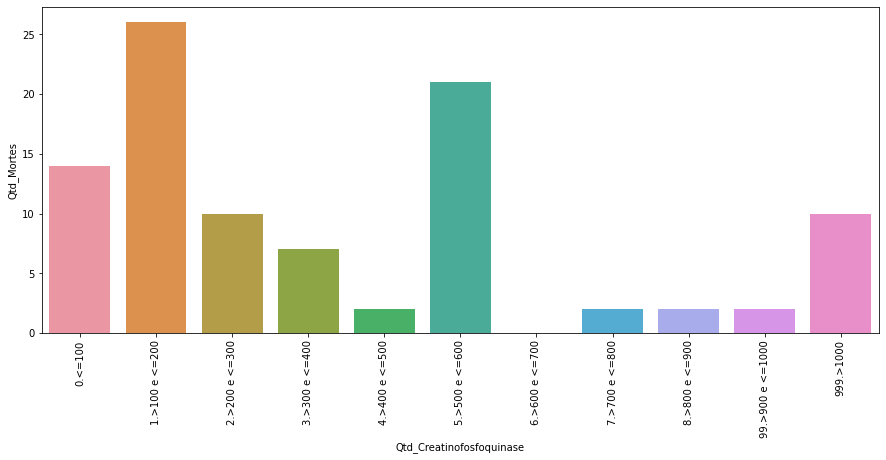

In [549]:
plt.figure(figsize=(15,6))
aux3 = dfDCV[['creatinine_agroup','DEATH_EVENT']].groupby('creatinine_agroup').sum().reset_index()
sns.set_palette("Reds")
ax = sns.barplot(x='creatinine_agroup',y='DEATH_EVENT',data=aux3)
plt.ylabel('Qtd_Mortes')
plt.xlabel('Qtd_Creatinofosfoquinase')
plt.xticks(rotation=90)

**H.04** - Quanto maior o nivel de creatinina sérica no sangue, maior a quantidade de mortes por doença cardiovascular 
   * **R:** Falso. A concetração de mortes estão entre 0.9 e 1.9

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 40 Text major ticklabel objects>)

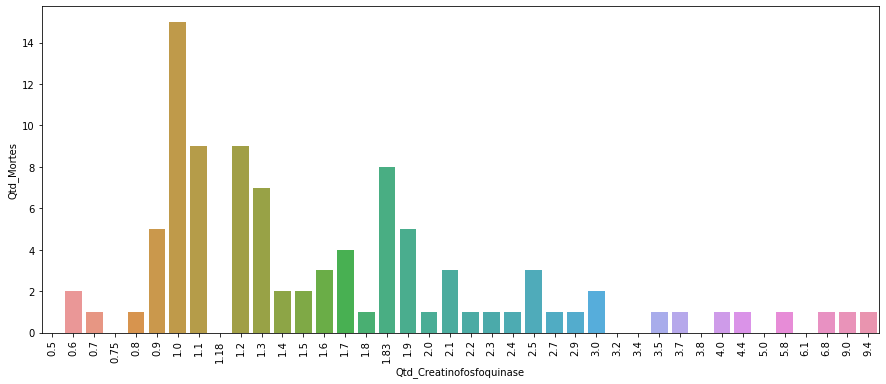

In [550]:
plt.figure(figsize=(15,6))
aux4 = dfDCV[['serum_creatinine','DEATH_EVENT']].groupby('serum_creatinine').sum().reset_index()
sns.set_palette("Reds")
ax = sns.barplot(x='serum_creatinine',y='DEATH_EVENT',data=aux4)
plt.ylabel('Qtd_Mortes')
plt.xlabel('Qtd_Creatinofosfoquinase')
plt.xticks(rotation=90)

**H.05** - Quanto mais pré-condições existentes, maior a quantidade de mortes por doença cardiovascular
   * **R:** Depende. Foi observado que pacientes com alguma pré-condição existente, tendem a morrer mais que pacientes sem pré-condições, porém, não se tem registro de mortes em pacientes com quatro pré-condições.

In [551]:
dfDCV['qtd_condicoes'] = dfDCV[['anaemia','diabetes','high_blood_pressure','smoking']].apply(lambda x: x.sum(),axis=1)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

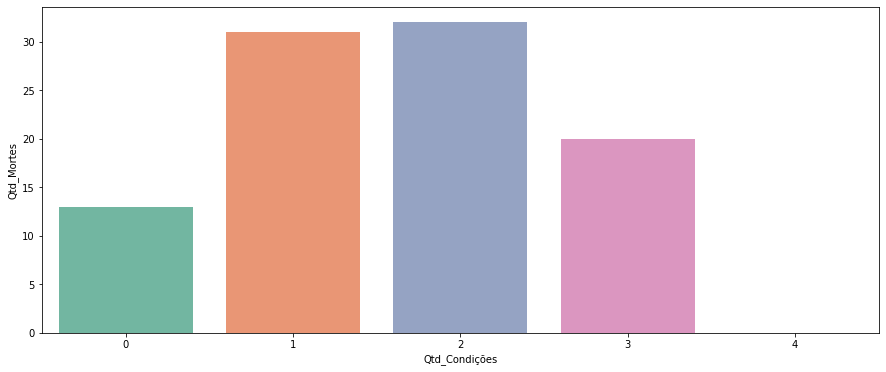

In [552]:
plt.figure(figsize=(15,6))
aux5 = dfDCV[['qtd_condicoes','DEATH_EVENT']].groupby('qtd_condicoes').sum().reset_index()
sns.set_palette("Set2")
ax = sns.barplot(x='qtd_condicoes',y='DEATH_EVENT',data=aux5)
plt.ylabel('Qtd_Mortes')
plt.xlabel('Qtd_Condições')
plt.xticks(rotation=0)

**H.06** - Quanto mais velho o paciente, maior a quantidade de mortes por doença cardiovascular
   * **R:** Depende. Até a faixa de 60 a 69 anos se tem um aumento no mumero de mortes, com pequena queda no numero após essa faixa.

In [553]:
def faixa_idade(i):
    if i < 50:
       s = "0 - Ate 49 anos"
    elif i < 60:
       s = "1 - 50 ~ 59 anos"
    elif i < 70:
       s = "2 - 60 ~ 69 anos"
    elif i < 80:
       s = "3 - 70 ~ 79 anos"
    else:
       s = "4 - Acima de 80 anos"
    
    return s

In [554]:
dfDCV['faixa_idade'] = dfDCV['age'].apply(faixa_idade)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

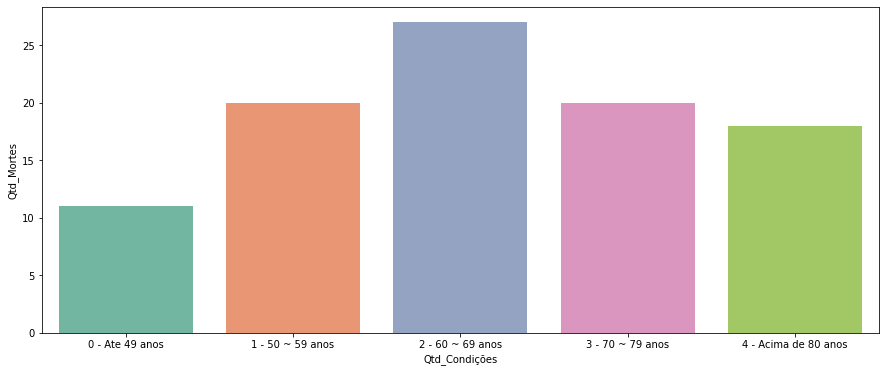

In [555]:
plt.figure(figsize=(15,6))
aux5 = dfDCV[['faixa_idade','DEATH_EVENT']].groupby('faixa_idade').sum().reset_index()
sns.set_palette("Set2")
ax = sns.barplot(x='faixa_idade',y='DEATH_EVENT',data=aux5)
plt.ylabel('Qtd_Mortes')
plt.xlabel('Qtd_Condições')
plt.xticks(rotation=0)

**H.07** - Pacientes que tem o historico de fumante, tendem a morrer mais que os não fumantes

In [556]:
def eqp2(x,y):
    if y == 'Feminino':
        s = x/total_mulher_death
    else:
        s = x/total_homem_death
    return s * 100

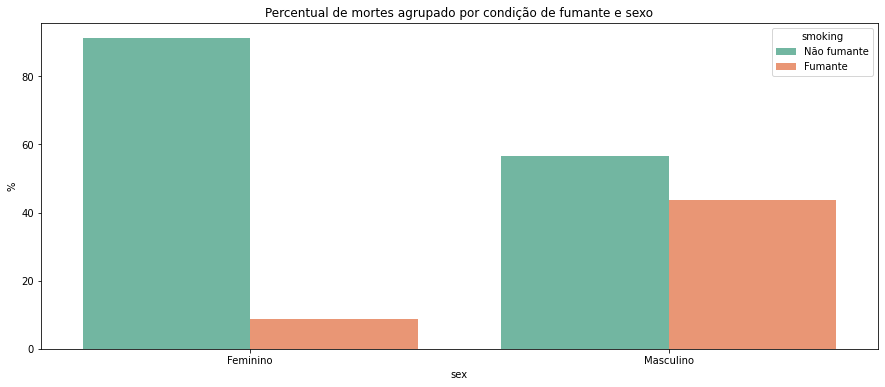

In [557]:
aux10 = dfDCV[['sex','smoking','DEATH_EVENT']]
aux10 = aux10[aux10['DEATH_EVENT'] == 1]
aux10 = aux10.groupby(['sex','smoking']).sum().reset_index()
aux10['sex'] = aux10['sex'].map({0:'Feminino',1:'Masculino'})
aux10['smoking'] = aux10['smoking'].map({0:'Não fumante',1:'Fumante'})

aux10['%'] = aux10.apply(lambda x: eqp2(x['DEATH_EVENT'],x['sex']),axis=1)
plt.figure(figsize=(15,6))
plt.title('Percentual de mortes agrupado por condição de fumante e sexo')
sns.barplot(x='sex',y='%',hue='smoking',data=aux10)


**P.01** - Qual o quantitativo de mortes por condições ou doenças, agrupado por sexo? 

In [558]:
def eqp1(x,y,z):
    if y == 'Feminino':
        s = y/x
    else:
        s = y/x
    return s * 100

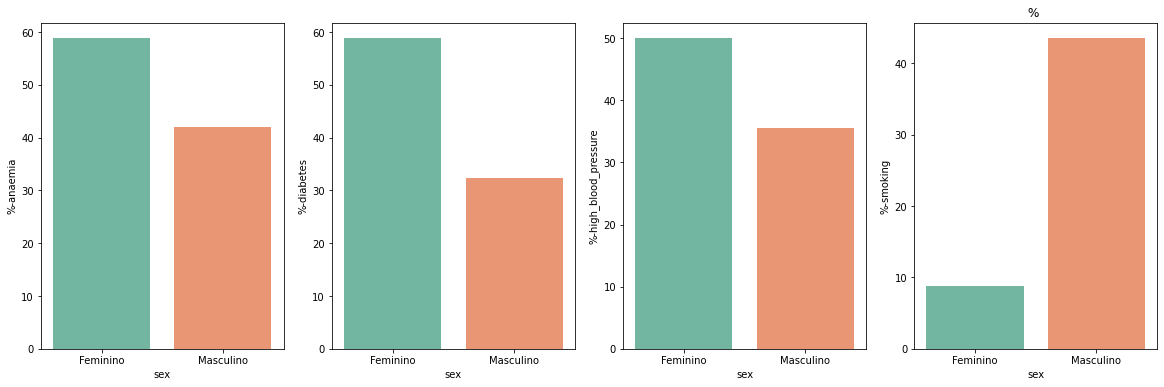

In [559]:
aux9 = dfDCV[['anaemia','diabetes','high_blood_pressure','smoking','sex','DEATH_EVENT']]
aux9 = aux9[aux9['DEATH_EVENT'] == 1]
aux9 = aux9.groupby('sex').sum().reset_index()
aux9['sex'] = aux9['sex'].map({0:'Feminino',1:'Masculino'}) 
col = ['anaemia','diabetes','high_blood_pressure','smoking']

for i in range (0,len(col)):
    aux9['%-'+col[i]] = aux9.apply(lambda x: eqp1(x['DEATH_EVENT'],x[col[i]],x['sex']),axis=1)
colT = ['%-anaemia','%-diabetes','%-high_blood_pressure','%-smoking']

fig, ax = plt.subplots(1,4,figsize=(20,6))
sns.set_palette("Set2")
for i in range(0,len(col)):
    sns.barplot(x='sex',y=colT[i],data=aux9,ax=ax[i])
    plt.xticks(rotation=0)
    plt.title('% ')

In [560]:
def eqp2(x,y):
    if y == 'Feminino':
        s = x/total_mulher_death
    else:
        s = x/total_homem_death
    return s * 100

**P.02** - A correlação entre a quantidade de sangue saindo do coração a cada contração com a quantidade de plaquetas no sangue?

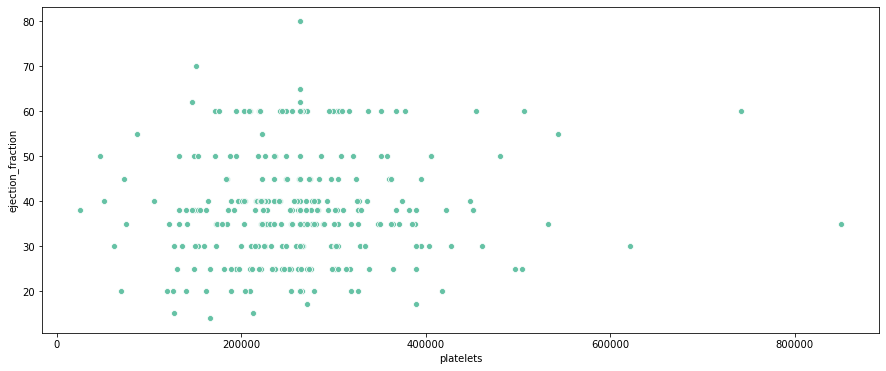

In [561]:
aux11 = dfDCV[['ejection_fraction','platelets']]
plt.figure(figsize=(15,6))
sns.scatterplot(x='platelets',y='ejection_fraction',data=aux11)

#### 2.2 - Estatística Descritiva

In [562]:
dfDCV.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,qtd_condicoes
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107,1.521739
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767,0.894819
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000,0.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000,1.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000,1.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000,2.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000,4.000000


In [1407]:
dfDCVcopy = dfDCV.copy()
dfDCVcopy = dfDCVcopy.drop(columns=['creatinine_agroup','qtd_condicoes','faixa_idade'],axis=0)

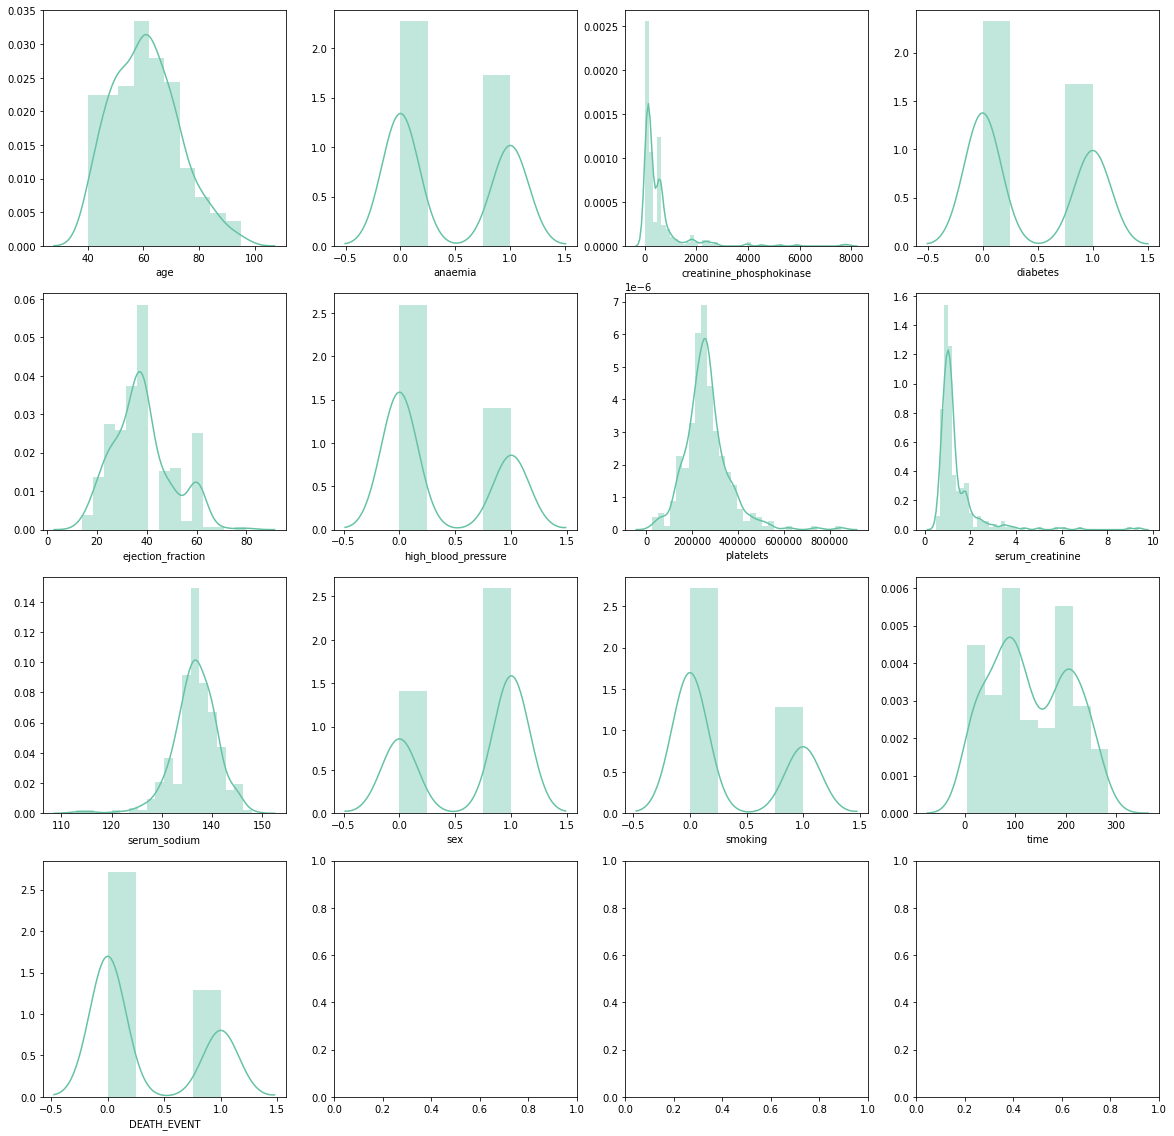

In [1408]:
fig, ax = plt.subplots(4,4,figsize=(20,20))
sns.set_palette("Set2")
for i, column in enumerate(dfDCVcopy.columns):
    sns.distplot(dfDCVcopy[column],ax=ax[i//4,i%4])

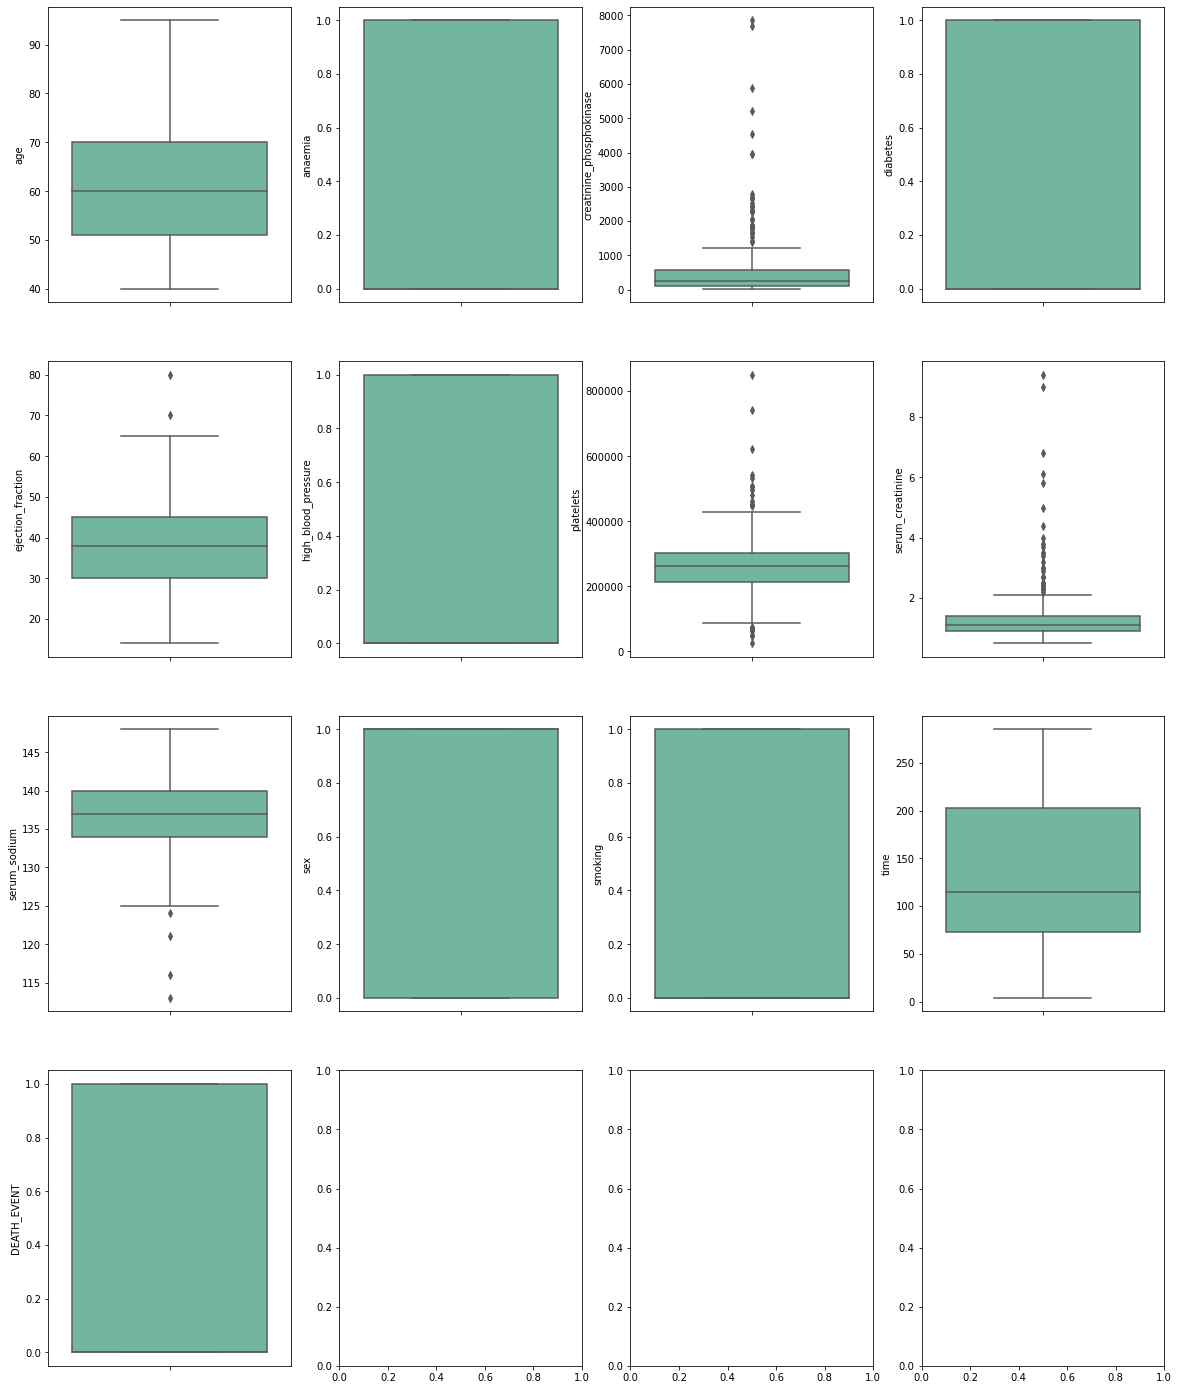

In [1409]:
fig, ax = plt.subplots(4,4,figsize=(20,25))
sns.set_palette("Set2")
for i, column in enumerate(dfDCVcopy.columns):
    sns.boxplot(dfDCVcopy[column],ax=ax[i//4,i%4],orient='v')

# 3.0 - Preparação dos dados

In [1410]:
col = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']

#### 3.1 Remoção de outliers

In [1411]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

for i in range(0,len(col)):
    dfDCVcopy = remove_outlier(dfDCVcopy,col[i])

#### 3.2 Balanceamento de classes

In [1412]:
variaveis = dfDCVcopy.drop('DEATH_EVENT',axis=1)
alvo = dfDCVcopy.DEATH_EVENT

In [1413]:
variaveis

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270


# 4.0 - Modelagem

In [1592]:
X_train, X_test, y_train, y_test = train_test_split(variaveis,alvo, random_state = 1, test_size = 0.2)

#### 4.1 Criando PipeLines

In [1593]:
pipe_knn = Pipeline([
        ('scaler', MinMaxScaler()),
        ('smote', SMOTE(sampling_strategy=0.85)),
        ('clf', KNeighborsClassifier())
        ])

In [1594]:
pipe_svm = Pipeline(steps=[
        ('smote', SMOTE(sampling_strategy=0.85)),
        ('scaler', MinMaxScaler()),
        ('clf', svm.SVC(probability=True))
        ])

In [1595]:
pipe_knn = Pipeline([
        ('scaler', MinMaxScaler()),
        ('smote', SMOTE(sampling_strategy=0.85)),
        ('clf', KNeighborsClassifier())
        ])

In [1596]:
pca = PCA()
logistic = LogisticRegression(max_iter=10000, tol=0.1)

pipe_lr = Pipeline([
        ('smote', SMOTE(sampling_strategy=0.85)),
        ('scaler', MinMaxScaler()),
        ('pca', pca), 
        ('logistic', logistic)
        ])
               

#### 4.2 Valores do GridSeacher

In [1597]:
valores = [1,2,3,4,5,6,7,8,9,10]

In [1598]:
grid_params_svm = [{
    'clf__kernel': ['linear', 'rbf'], 
    'clf__C': valores,
}]

In [1599]:
grid_params_knn = [{
    'clf__n_neighbors': valores,
}]

In [1600]:
grid_params_lr = [{
    'pca__n_components': valores,
    'logistic__C': np.logspace(-1, 1, 1),
}]

#### 4.4 Construindo o GridSeach

In [1601]:
gs_svm = GridSearchCV(
    estimator=pipe_svm,
    param_grid=grid_params_svm,
    scoring='accuracy',
    cv=10,
)

In [1602]:
gs_knn = GridSearchCV(
    estimator=pipe_knn,
    param_grid=grid_params_knn,
    scoring='accuracy',
    cv=10,
)

In [1603]:
gs_lr = GridSearchCV(
    estimator=pipe_lr,
    param_grid=grid_params_lr,
    scoring='accuracy',
    cv=10,
)

#### 4.5 Verificando os melhores parametros

#### 4.5.1 Verificando os melhores parametros - KNN

In [1604]:
gs_knn.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('smote', SMOTE(sampling_strategy=0.85)),
                                       ('clf', KNeighborsClassifier())]),
             param_grid=[{'clf__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             scoring='accuracy')

In [1605]:
print('Melhores parâmetros: %s' % gs_knn.best_params_)
print('Melhores Acurácia: %.3f' % gs_knn.best_score_)

Melhores parâmetros: {'clf__n_neighbors': 4}
Melhores Acurácia: 0.691


#### 4.5.2 Verificando os melhores parametros - SVM

In [1606]:
gs_svm.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.85)),
                                       ('scaler', MinMaxScaler()),
                                       ('clf', SVC(probability=True))]),
             param_grid=[{'clf__C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'clf__kernel': ['linear', 'rbf']}],
             scoring='accuracy')

In [1607]:
print('Melhores parâmetros: %s' % gs_svm.best_params_)
print('Melhores Acurácia: %.3f' % gs_svm.best_score_)

Melhores parâmetros: {'clf__C': 10, 'clf__kernel': 'linear'}
Melhores Acurácia: 0.785


#### 4.5.3 Verificando os melhores parametros - Logistc Regression

In [1608]:
gs_lr.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.85)),
                                       ('scaler', MinMaxScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(max_iter=10000,
                                                           tol=0.1))]),
             param_grid=[{'logistic__C': array([0.1]),
                          'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                10]}],
             scoring='accuracy')

In [1609]:
print('Melhores parâmetros: %s' % gs_lr.best_params_)
print('Melhores Acurácia: %.3f' % gs_lr.best_score_)

Melhores parâmetros: {'logistic__C': 0.1, 'pca__n_components': 10}
Melhores Acurácia: 0.764


# 5.0 - Avaliação

#### 5.1 Avaliação do Modelo - SVM

In [1610]:
valoresPreditosTesteSvm = gs_svm.predict(X_test)

In [1611]:
print('Acuracia: {:.2f} %'.format(metrics.accuracy_score(y_test,valoresPreditosTesteSvm)*100))

Acuracia: 95.56 %


In [1612]:
print (pd.crosstab(y_test, gs_svm.predict(X_test), rownames=['Real'], colnames=['Predito'], margins=True), '')

Predito   0   1  All
Real                
0        27   1   28
1         1  16   17
All      28  17   45 


In [1613]:
print (metrics.classification_report(y_test,gs_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



#### 5.2 Avaliação do Modelo - KNN

In [1614]:
valoresPreditosTesteKnn =gs_knn.predict(X_test)

In [1615]:
print('Acuracia: {:.2f} %'.format(metrics.accuracy_score(y_test,valoresPreditosTesteKnn)*100))

Acuracia: 73.33 %


In [1616]:
print (pd.crosstab(y_test, gs_knn.predict(X_test), rownames=['Real'], colnames=['Predito'], margins=True), '')

Predito   0   1  All
Real                
0        21   7   28
1         5  12   17
All      26  19   45 


In [1617]:
print (metrics.classification_report(y_test,gs_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.63      0.71      0.67        17

    accuracy                           0.73        45
   macro avg       0.72      0.73      0.72        45
weighted avg       0.74      0.73      0.74        45



#### 5.3 Avaliação do Modelo - Logistic Regression

In [1618]:
valoresPreditosTesteLr = gs_lr.predict(X_test)

In [1619]:
print('Acuracia: {:.2f} %'.format(metrics.accuracy_score(y_test,valoresPreditosTesteLr)*100))

Acuracia: 86.67 %


In [1620]:
print (pd.crosstab(y_test, gs_lr.predict(X_test), rownames=['Real'], colnames=['Predito'], margins=True), '')

Predito   0   1  All
Real                
0        27   1   28
1         5  12   17
All      32  13   45 


In [1621]:
print (metrics.classification_report(y_test,gs_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        28
           1       0.92      0.71      0.80        17

    accuracy                           0.87        45
   macro avg       0.88      0.84      0.85        45
weighted avg       0.87      0.87      0.86        45



#### 5.3 Testando o Modelos

**ROC** é uma curva de probabilidade. Ela é criada traçando a taxa verdadeiro-positivo contra a taxa de falsos-positivos. Ou seja, numero de vezes que o classificador acertou a predição conta o número de vezes que o classificador errou a predição.  

O **AUC** representa o grau ou medida de separabilidade. Quanto maior o AUC, melhor o modelo está em prever 0s como 0s e 1s como 1s. Por exemplo, quanto maior a AUC, melhor o modelo está em distinguir entre pacientes com doença e pacientes sem doença

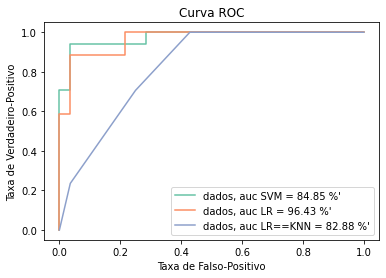

In [1622]:
y_pred_probaSVM = gs_svm.predict_proba(X_test)[::,1]
fprSVM, tprSVM, _ = metrics.roc_curve(y_test,  y_pred_probaSVM)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

y_pred_probaLR = gs_lr.predict_proba(X_test)[::,1]
fprLR, tprLR, _ = metrics.roc_curve(y_test,  y_pred_probaLR)
aucLR = metrics.roc_auc_score(y_test, y_pred_probaLR)

y_pred_probaKNN = gs_knn.predict_proba(X_test)[::,1]
fprKNN , tprKNN , _ = metrics.roc_curve(y_test,  y_pred_probaKNN )
aucKNN  = metrics.roc_auc_score(y_test, y_pred_probaKNN )

plt.plot(fprSVM,tprSVM,label="dados, auc SVM = {:.2f} %'".format(aucSVM*100))
plt.plot(fprLR,tprLR,label="dados, auc LR = {:.2f} %'".format(aucLR*100))
plt.plot(fprKNN,tprKNN,label="dados, auc LR==KNN = {:.2f} %'".format(aucKNN*100))

plt.legend(loc=4)
plt.title('Curva ROC')
plt.xlabel('Taxa de Falso-Positivo')
plt.ylabel('Taxa de Verdadeiro-Positivo')
plt.show()

In [1623]:
testeAleatorio = dfDCVcopy.sample(20)

In [1624]:
alvoTeste = testeAleatorio.DEATH_EVENT
variaveisTeste = testeAleatorio.drop('DEATH_EVENT',axis=1)

In [1625]:
p = gs_svm.predict_proba(variaveisTeste)[:,1]
for i in range(0,len(p)):
    print('Probabilidade do paciente "',variaveisTeste.index[i],'" morrer: {:.2f} %'.format(p[i] * 100))

Probabilidade do paciente " 102 " morrer: 66.14 %
Probabilidade do paciente " 58 " morrer: 48.49 %
Probabilidade do paciente " 12 " morrer: 76.91 %
Probabilidade do paciente " 45 " morrer: 82.23 %
Probabilidade do paciente " 215 " morrer: 25.77 %
Probabilidade do paciente " 136 " morrer: 22.91 %
Probabilidade do paciente " 125 " morrer: 28.74 %
Probabilidade do paciente " 142 " morrer: 34.50 %
Probabilidade do paciente " 112 " morrer: 73.92 %
Probabilidade do paciente " 37 " morrer: 73.30 %
Probabilidade do paciente " 242 " morrer: 2.33 %
Probabilidade do paciente " 209 " morrer: 4.68 %
Probabilidade do paciente " 265 " morrer: 1.80 %
Probabilidade do paciente " 191 " morrer: 23.07 %
Probabilidade do paciente " 83 " morrer: 88.90 %
Probabilidade do paciente " 156 " morrer: 49.36 %
Probabilidade do paciente " 63 " morrer: 37.94 %
Probabilidade do paciente " 252 " morrer: 2.97 %
Probabilidade do paciente " 232 " morrer: 3.83 %
Probabilidade do paciente " 30 " morrer: 98.49 %


In [1626]:
np.array(alvoTeste)

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [1627]:
gs_svm.predict(variaveisTeste)

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [1628]:
gs_lr.predict(variaveisTeste)

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

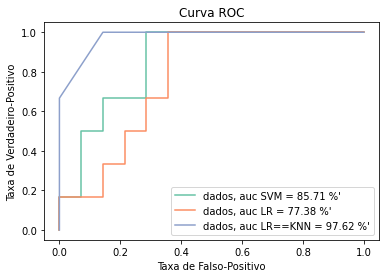

In [1629]:
y_pred_probaSVM = gs_svm.predict_proba(variaveisTeste)[::,1]
fprSVM, tprSVM, _ = metrics.roc_curve(alvoTeste,  y_pred_probaSVM)
aucSVM = metrics.roc_auc_score(alvoTeste, y_pred_probaSVM)

y_pred_probaLR = gs_lr.predict_proba(variaveisTeste)[::,1]
fprLR, tprLR, _ = metrics.roc_curve(alvoTeste,  y_pred_probaLR)
aucLR = metrics.roc_auc_score(alvoTeste, y_pred_probaLR)

y_pred_probaKNN = gs_knn.predict_proba(variaveisTeste)[::,1]
fprKNN , tprKNN , _ = metrics.roc_curve(alvoTeste,  y_pred_probaKNN )
aucKNN  = metrics.roc_auc_score(alvoTeste, y_pred_probaKNN )

plt.plot(fprSVM,tprSVM,label="dados, auc SVM = {:.2f} %'".format(aucSVM*100))
plt.plot(fprLR,tprLR,label="dados, auc LR = {:.2f} %'".format(aucLR*100))
plt.plot(fprKNN,tprKNN,label="dados, auc LR==KNN = {:.2f} %'".format(aucKNN*100))
plt.legend(loc=4)
plt.title('Curva ROC')
plt.xlabel('Taxa de Falso-Positivo')
plt.ylabel('Taxa de Verdadeiro-Positivo')
plt.show()